### K-means clustering: 
### To cluster the increased cum cases during the first 10 days after school closure for 34 countries

The 34 countries are all EU countries, United Kingdom, Switzerland, United States, China, South Korea, Japan and Singapore.

The raw data of Covid-19 cases was feteched from Johns Hopkins University(JHU) CCSE repository. 

First, select 2 features: 
1. The cum_case logarithm values of the first day after school closure by 34 countries
2. The growth rate bewteen the first day and the last day school closure by 34 countries 

Second, use the Elbow method to find the optimal number of clusters;

Third, do k-means clustering.

There are "43 states, 4 U.S. territories, and the District of Columbia have ordered or recommended school building closures for the rest of the academic year". The school closure dates are slightly different, I chose New York school closure date 18.03.2020 as US school closure date. China is a large country, In year 2020, China population is more than 1,4 billion. The population of Hubei province is more than 1 million. In year 2010, population of Hubei was more than 57 million. On 23 Jan.2020, Wuhan and other cities in Hubei were lockdown. By 27.4.2020, there are 68128 cases in Hubei provice, it occupies 81% of total cases in China. That is the reason, why I use the cum case of Hubei provice instead of total case of China. 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime 
import operator
plt.style.use('seaborn')
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
# connect to the link
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'


In [3]:
# read 'confirmed cases' from the link
confirmed = pd.read_csv(url_confirmed, index_col=[0,1,2,3])
confirmed.head()

1/22/20  1/23/20  1/24/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000        0        0        0   
               Albania         41.1533 20.1683        0        0        0   
               Algeria         28.0339 1.6596         0        0        0   
               Andorra         42.5063 1.5218         0        0        0   
               Angola         -11.2027 17.8739        0        0        0   

                                                1/25/20  1/26/20  1/27/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000        0        0        0   
               Albania         41.1533 20.1683        0        0        0   
               Algeria         28.0339 1.6596         0        0        0   
               Andorra         42.5063 1.5218         0        0        0   
               Angola         -11.2027 17.8739        0        0        0   

                                                1/28/20  1/29/20  1/30/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000        0        0        0   
               Albania         41.1533 20.1683        0        0        0   
               Algeria         28.0339 1.6596         0        0        0   
               Andorra         42.5063 1.5218         0        0        0   
               Angola         -11.2027 17.8739        0        0        0   

                                                1/31/20  ...  4/17/20  \
Province/State Country/Region Lat      Long              ...            
NaN            Afghanistan     33.0000 65.0000        0  ...      906   
               Albania         41.1533 20.1683        0  ...      539   
               Algeria         28.0339 1.6596         0  ...     2418   
               Andorra         42.5063 1.5218         0  ...      696   
               Angola         -11.2027 17.8739        0  ...       19   

                                                4/18/20  4/19/20  4/20/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000      933      996     1026   
               Albania         41.1533 20.1683      548      562      584   
               Algeria         28.0339 1.6596      2534     2629     2718   
               Andorra         42.5063 1.5218       704      713      717   
               Angola         -11.2027 17.8739       24       24       24   

                                                4/21/20  4/22/20  4/23/20  \
Province/State Country/Region Lat      Long                                 
NaN            Afghanistan     33.0000 65.0000     1092     1176     1279   
               Albania         41.1533 20.1683      609      634      663   
               Algeria         28.0339 1.6596      2811     2910     3007   
               Andorra         42.5063 1.5218       717      723      723   
               Angola         -11.2027 17.8739       24       25       25   

                                                4/24/20  4/25/20  4/26/20  
Province/State Country/Region Lat      Long                                
NaN            Afghanistan     33.0000 65.0000     1351     1463     1531  
               Albania         41.1533 20.1683      678      712      726  
               Algeria         28.0339 1.6596      3127     3256     3382  
               Andorra         42.5063 1.5218       731      738      738  
               Angola         -11.2027 17.8739       25       25       26  

[5 rows x 96 columns]

In [4]:
#Stack the datframe to turn the date columns into rows
case = confirmed.stack()
case.tail()

Province/State  Country/Region  Lat        Long              
NaN             Yemen           15.552727  48.516388  4/22/20    1
                                                      4/23/20    1
                                                      4/24/20    1
                                                      4/25/20    1
                                                      4/26/20    1
dtype: int64

In [5]:
# reset index 
case = case.reset_index()
case.head()

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Afghanistan,33.0,65.0,1/22/20,0
1,NaN,Afghanistan,33.0,65.0,1/23/20,0
2,NaN,Afghanistan,33.0,65.0,1/24/20,0
3,NaN,Afghanistan,33.0,65.0,1/25/20,0
4,NaN,Afghanistan,33.0,65.0,1/26/20,0


In [6]:
# rename the columns
case = case.rename(columns = {"Province/State": "prov_state", 
                                  "Country/Region":"country", 
                              "Lat": "lat", "Long": "long",
                                  "level_4": "date", 0: "cum_case"}) 
case.head()

,prov_state,country,lat,long,date,cum_case
0,NaN,Afghanistan,33.0,65.0,1/22/20,0
1,NaN,Afghanistan,33.0,65.0,1/23/20,0
2,NaN,Afghanistan,33.0,65.0,1/24/20,0
3,NaN,Afghanistan,33.0,65.0,1/25/20,0
4,NaN,Afghanistan,33.0,65.0,1/26/20,0


In [7]:
# check the objects in the column 'prov_state'
case.prov_state.unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [8]:
case = case[case['cum_case']!= 0]
case.head()

,prov_state,country,lat,long,date,cum_case
33,NaN,Afghanistan,33.0,65.0,2/24/20,1
34,NaN,Afghanistan,33.0,65.0,2/25/20,1
35,NaN,Afghanistan,33.0,65.0,2/26/20,1
36,NaN,Afghanistan,33.0,65.0,2/27/20,1
37,NaN,Afghanistan,33.0,65.0,2/28/20,1


In [9]:
# combine 2 columns 'prov_state' and 'country' to 'location'
case['location'] = np.where(case.prov_state.isnull(), case.country, case.prov_state)

In [10]:
# create a new column:'new_case' in the dataframe which 'location' is groupby.
case['new_case'] = case.groupby('location').cum_case.diff(1)

In [11]:
# select columns and change the order of columns in the dataframe
case = case[["date", "location", "new_case", "cum_case"]]

In [12]:
# convert the date column to datetime object
case.date = pd.to_datetime(case.date, format='%m/%d/%y')
case

,date,location,new_case,cum_case
33,2020-02-24,Afghanistan,NaN,1
34,2020-02-25,Afghanistan,0.0,1
35,2020-02-26,Afghanistan,0.0,1
36,2020-02-27,Afghanistan,0.0,1
37,2020-02-28,Afghanistan,0.0,1
...,...,...,...,...
25339,2020-04-22,Yemen,0.0,1
25340,2020-04-23,Yemen,0.0,1
25341,2020-04-24,Yemen,0.0,1
25342,2020-04-25,Yemen,0.0,1


In [13]:
case['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan',
       'Central African Republic', 'Chad', 'Chile', 'Anhui', 'Beijing',
       'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou',
       'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei',
       'Hunan', 'Inne

In [14]:
# Austria from 16/3, 10 days school closure due to Covid_19
Austria = case[case.location.isin(['Austria'])]
Austria = Austria.loc['1590':'1599']
Austria['Days'] = [1,2,3,4,5,6,7,8,9,10]
Austria = Austria.set_index('Days')
Austria

,date,location,new_case,cum_case
Days,,,,
1,2020-03-16,Austria,158.0,1018
2,2020-03-17,Austria,314.0,1332
3,2020-03-18,Austria,314.0,1646
4,2020-03-19,Austria,367.0,2013
5,2020-03-20,Austria,375.0,2388
6,2020-03-21,Austria,426.0,2814
7,2020-03-22,Austria,768.0,3582
8,2020-03-23,Austria,892.0,4474
9,2020-03-24,Austria,809.0,5283


In [15]:
# Belgium from 13/3, 10 days school closure due to Covid_19
Belgium = case[case.location.isin(['Belgium'])]
Belgium = Belgium.loc['2259':'2268']
Belgium['Days'] = [1,2,3,4,5,6,7,8,9,10]
Belgium = Belgium.set_index('Days')
Belgium

,date,location,new_case,cum_case
Days,,,,
1,2020-03-13,Belgium,245.0,559
2,2020-03-14,Belgium,130.0,689
3,2020-03-15,Belgium,197.0,886
4,2020-03-16,Belgium,172.0,1058
5,2020-03-17,Belgium,185.0,1243
6,2020-03-18,Belgium,243.0,1486
7,2020-03-19,Belgium,309.0,1795
8,2020-03-20,Belgium,462.0,2257
9,2020-03-21,Belgium,558.0,2815


In [16]:
# Bulgaria from 26/3, 10 days school closure due to Covid_19
Bulgaria = case[case.location.isin(['Bulgaria'])]
Bulgaria = Bulgaria.loc['2944':'2953']
Bulgaria['Days'] = [1,2,3,4,5,6,7,8,9,10]
Bulgaria = Bulgaria.set_index('Days')
Bulgaria

,date,location,new_case,cum_case
Days,,,,
1,2020-03-26,Bulgaria,22.0,264
2,2020-03-27,Bulgaria,29.0,293
3,2020-03-28,Bulgaria,38.0,331
4,2020-03-29,Bulgaria,15.0,346
5,2020-03-30,Bulgaria,13.0,359
6,2020-03-31,Bulgaria,40.0,399
7,2020-04-01,Bulgaria,23.0,422
8,2020-04-02,Bulgaria,35.0,457
9,2020-04-03,Bulgaria,28.0,485


In [17]:
# Croatia from 17/3, 10 days school closure due to Covid_19
Croatia = case[case.location.isin(['Croatia'])]
Croatia = Croatia.loc['8407':'8416']
Croatia['Days'] = [1,2,3,4,5,6,7,8,9,10]
Croatia = Croatia.set_index('Days')
Croatia

,date,location,new_case,cum_case
Days,,,,
1,2020-03-17,Croatia,8.0,65
2,2020-03-18,Croatia,16.0,81
3,2020-03-19,Croatia,24.0,105
4,2020-03-20,Croatia,23.0,128
5,2020-03-21,Croatia,78.0,206
6,2020-03-22,Croatia,48.0,254
7,2020-03-23,Croatia,61.0,315
8,2020-03-24,Croatia,67.0,382
9,2020-03-25,Croatia,60.0,442


In [18]:
# Cyprus from 13/3, 10 days school closure due to Covid_19
Cyprus = case[case.location.isin(['Cyprus'])]
Cyprus = Cyprus.loc['8691':'8700']
Cyprus['Days'] = [1,2,3,4,5,6,7,8,9,10]
Cyprus = Cyprus.set_index('Days')
Cyprus

,date,location,new_case,cum_case
Days,,,,
1,2020-03-13,Cyprus,8.0,14
2,2020-03-14,Cyprus,12.0,26
3,2020-03-15,Cyprus,0.0,26
4,2020-03-16,Cyprus,7.0,33
5,2020-03-17,Cyprus,13.0,46
6,2020-03-18,Cyprus,3.0,49
7,2020-03-19,Cyprus,18.0,67
8,2020-03-20,Cyprus,0.0,67
9,2020-03-21,Cyprus,17.0,84


In [19]:
# Czech from 11/3, 10 days school closure due to Covid_19
Czech = case[case.location.isin(['Czechia'])]
Czech = Czech.loc['8785':'8794']
Czech['Days'] = [1,2,3,4,5,6,7,8,9,10]
Czech = Czech.set_index('Days')
Czech


,date,location,new_case,cum_case
Days,,,,
1,2020-03-11,Czechia,50.0,91
2,2020-03-12,Czechia,3.0,94
3,2020-03-13,Czechia,47.0,141
4,2020-03-14,Czechia,48.0,189
5,2020-03-15,Czechia,64.0,253
6,2020-03-16,Czechia,45.0,298
7,2020-03-17,Czechia,98.0,396
8,2020-03-18,Czechia,68.0,464
9,2020-03-19,Czechia,230.0,694


In [20]:
# Denmark from 16/3, 10 days school closure due to Covid_19
Denmark = case[case.location.isin(['Denmark'])]
Denmark = Denmark.loc['9078':'9087']
Denmark['Days'] = [1,2,3,4,5,6,7,8,9,10]
Denmark = Denmark.set_index('Days')
Denmark

,date,location,new_case,cum_case
Days,,,,
1,2020-03-16,Denmark,50.0,914
2,2020-03-17,Denmark,63.0,977
3,2020-03-18,Denmark,80.0,1057
4,2020-03-19,Denmark,94.0,1151
5,2020-03-20,Denmark,104.0,1255
6,2020-03-21,Denmark,71.0,1326
7,2020-03-22,Denmark,69.0,1395
8,2020-03-23,Denmark,55.0,1450
9,2020-03-24,Denmark,141.0,1591


In [21]:
# Estonia from 16/3, 10 days school closure due to Covid_19
Estonia = case[case.location.isin(['Estonia'])]
Estonia = Estonia.loc['9846':'9855']
Estonia['Days'] = [1,2,3,4,5,6,7,8,9,10]
Estonia = Estonia.set_index('Days')
Estonia

,date,location,new_case,cum_case
Days,,,,
1,2020-03-16,Estonia,34.0,205
2,2020-03-17,Estonia,20.0,225
3,2020-03-18,Estonia,33.0,258
4,2020-03-19,Estonia,9.0,267
5,2020-03-20,Estonia,16.0,283
6,2020-03-21,Estonia,23.0,306
7,2020-03-22,Estonia,20.0,326
8,2020-03-23,Estonia,26.0,352
9,2020-03-24,Estonia,17.0,369


In [22]:
# Finland from 18/3, 10 days school closure due to Covid_19
Finland = case[case.location.isin(['Finland'])]
Finland = Finland.loc['10232':'10241']
Finland['Days'] = [1,2,3,4,5,6,7,8,9,10]
Finland = Finland.set_index('Days')
Finland

,date,location,new_case,cum_case
Days,,,,
1,2020-03-18,Finland,15.0,336
2,2020-03-19,Finland,64.0,400
3,2020-03-20,Finland,50.0,450
4,2020-03-21,Finland,73.0,523
5,2020-03-22,Finland,103.0,626
6,2020-03-23,Finland,74.0,700
7,2020-03-24,Finland,92.0,792
8,2020-03-25,Finland,88.0,880
9,2020-03-26,Finland,78.0,958


In [23]:
# France from 16/3, 10 days school closure due to Covid_19
France = case[case.location.isin(['France'])]
France = France.loc['11190':'11199']
France['Days'] = [1,2,3,4,5,6,7,8,9,10]
France = France.set_index('Days')
France

,date,location,new_case,cum_case
Days,,,,
1,2020-03-16,France,2134.0,6633
2,2020-03-17,France,1019.0,7652
3,2020-03-18,France,1391.0,9043
4,2020-03-19,France,1828.0,10871
5,2020-03-20,France,1741.0,12612
6,2020-03-21,France,1670.0,14282
7,2020-03-22,France,1736.0,16018
8,2020-03-23,France,3838.0,19856
9,2020-03-24,France,2448.0,22304


In [24]:
# Germany from 18/3, 10 days school closure due to Covid_19
Germany = case[case.location.isin(['Germany'])]
Germany = Germany.loc['11576':'11585']
Germany['Days'] = [1,2,3,4,5,6,7,8,9,10]
Germany = Germany.set_index('Days')
Germany

,date,location,new_case,cum_case
Days,,,,
1,2020-03-18,Germany,3070.0,12327
2,2020-03-19,Germany,2993.0,15320
3,2020-03-20,Germany,4528.0,19848
4,2020-03-21,Germany,2365.0,22213
5,2020-03-22,Germany,2660.0,24873
6,2020-03-23,Germany,4183.0,29056
7,2020-03-24,Germany,3930.0,32986
8,2020-03-25,Germany,4337.0,37323
9,2020-03-26,Germany,6615.0,43938


In [25]:
# Greece from 11/3, 10 days school closure due to Covid_19
Greece = case[case.location.isin(['Greece'])]
Greece = Greece.loc['11761':'11770']
Greece['Days'] = [1,2,3,4,5,6,7,8,9,10]
Greece = Greece.set_index('Days')
Greece

,date,location,new_case,cum_case
Days,,,,
1,2020-03-11,Greece,10.0,99
2,2020-03-12,Greece,0.0,99
3,2020-03-13,Greece,91.0,190
4,2020-03-14,Greece,38.0,228
5,2020-03-15,Greece,103.0,331
6,2020-03-16,Greece,0.0,331
7,2020-03-17,Greece,56.0,387
8,2020-03-18,Greece,31.0,418
9,2020-03-19,Greece,0.0,418


In [26]:
# Hungary from 16/3, 10 days school closure due to Covid_19
Hungary = case[case.location.isin(['Hungary'])]
Hungary = Hungary.loc['12438':'12447']
Hungary['Days'] = [1,2,3,4,5,6,7,8,9,10]
Hungary = Hungary.set_index('Days')
Hungary

,date,location,new_case,cum_case
Days,,,,
1,2020-03-16,Hungary,7.0,39
2,2020-03-17,Hungary,11.0,50
3,2020-03-18,Hungary,8.0,58
4,2020-03-19,Hungary,15.0,73
5,2020-03-20,Hungary,12.0,85
6,2020-03-21,Hungary,18.0,103
7,2020-03-22,Hungary,28.0,131
8,2020-03-23,Hungary,36.0,167
9,2020-03-24,Hungary,20.0,187


In [27]:
# Ireland from 12/3, 10 days school closure due to Covid_19
Ireland = case[case.location.isin(['Ireland'])]
Ireland = Ireland.loc['13010':'13019']
Ireland['Days'] = [1,2,3,4,5,6,7,8,9,10]
Ireland = Ireland.set_index('Days')
Ireland

,date,location,new_case,cum_case
Days,,,,
1,2020-03-12,Ireland,0.0,43
2,2020-03-13,Ireland,47.0,90
3,2020-03-14,Ireland,39.0,129
4,2020-03-15,Ireland,0.0,129
5,2020-03-16,Ireland,40.0,169
6,2020-03-17,Ireland,54.0,223
7,2020-03-18,Ireland,69.0,292
8,2020-03-19,Ireland,265.0,557
9,2020-03-20,Ireland,126.0,683


In [28]:
# Italy from 10/3, 10 days school closure due to Covid_19
Italy = case[case.location.isin(['Italy'])]
Italy = Italy.loc['13200':'13209190']
Italy['Days'] = [1,2,3,4,5,6,7,8,9,10]
Italy = Italy.set_index('Days')
Italy

,date,location,new_case,cum_case
Days,,,,
1,2020-03-10,Italy,977.0,10149
2,2020-03-11,Italy,2313.0,12462
3,2020-03-12,Italy,0.0,12462
4,2020-03-13,Italy,5198.0,17660
5,2020-03-14,Italy,3497.0,21157
6,2020-03-15,Italy,3590.0,24747
7,2020-03-16,Italy,3233.0,27980
8,2020-03-17,Italy,3526.0,31506
9,2020-03-18,Italy,4207.0,35713


In [29]:
# Latvia from 13/3, 10 days school closure due to Covid_19
Latvia = case[case.location.isin(['Latvia'])]
Latvia = Latvia.loc['14067':'14076']
Latvia['Days'] = [1,2,3,4,5,6,7,8,9,10]
Latvia = Latvia.set_index('Days')
Latvia

,date,location,new_case,cum_case
Days,,,,
1,2020-03-13,Latvia,7.0,17
2,2020-03-14,Latvia,9.0,26
3,2020-03-15,Latvia,4.0,30
4,2020-03-16,Latvia,4.0,34
5,2020-03-17,Latvia,15.0,49
6,2020-03-18,Latvia,22.0,71
7,2020-03-19,Latvia,15.0,86
8,2020-03-20,Latvia,25.0,111
9,2020-03-21,Latvia,13.0,124


In [30]:
# Lithuania from 16/3, 10 days school closure due to Covid_19
Lithuania = case[case.location.isin(['Lithuania'])]
Lithuania = Lithuania.loc['14454':'14463']
Lithuania['Days'] = [1,2,3,4,5,6,7,8,9,10]
Lithuania = Lithuania.set_index('Days')
Lithuania

,date,location,new_case,cum_case
Days,,,,
1,2020-03-16,Lithuania,5.0,17
2,2020-03-17,Lithuania,8.0,25
3,2020-03-18,Lithuania,2.0,27
4,2020-03-19,Lithuania,9.0,36
5,2020-03-20,Lithuania,13.0,49
6,2020-03-21,Lithuania,34.0,83
7,2020-03-22,Lithuania,60.0,143
8,2020-03-23,Lithuania,36.0,179
9,2020-03-24,Lithuania,30.0,209


In [31]:
# luxembourg from 16/3, 10 days school closure due to Covid_19
Luxembourg = case[case.location.isin(['Luxembourg'])]
Luxembourg = Luxembourg.loc['14550':'14559']
Luxembourg['Days'] = [1,2,3,4,5,6,7,8,9,10]
Luxembourg = Luxembourg.set_index('Days')
Luxembourg

,date,location,new_case,cum_case
Days,,,,
1,2020-03-16,Luxembourg,18.0,77
2,2020-03-17,Luxembourg,63.0,140
3,2020-03-18,Luxembourg,63.0,203
4,2020-03-19,Luxembourg,132.0,335
5,2020-03-20,Luxembourg,149.0,484
6,2020-03-21,Luxembourg,186.0,670
7,2020-03-22,Luxembourg,128.0,798
8,2020-03-23,Luxembourg,77.0,875
9,2020-03-24,Luxembourg,224.0,1099


In [32]:
# Malta from 13/3, 10 days school closure due to Covid_19
Malta = case[case.location.isin(['Malta'])]
Malta = Malta.loc['14931':'14940']
Malta['Days'] = [1,2,3,4,5,6,7,8,9,10]
Malta = Malta.set_index('Days')
Malta

,date,location,new_case,cum_case
Days,,,,
1,2020-03-13,Malta,6.0,12
2,2020-03-14,Malta,6.0,18
3,2020-03-15,Malta,3.0,21
4,2020-03-16,Malta,9.0,30
5,2020-03-17,Malta,8.0,38
6,2020-03-18,Malta,0.0,38
7,2020-03-19,Malta,15.0,53
8,2020-03-20,Malta,11.0,64
9,2020-03-21,Malta,9.0,73


In [33]:
# Netherlands from 16/3, 10 days school closure due to Covid_19
Netherlands = case[case.location.isin(['Netherlands'])]
Netherlands = Netherlands.loc['16278':'16287']
Netherlands['Days'] = [1,2,3,4,5,6,7,8,9,10]
Netherlands = Netherlands.set_index('Days')
Netherlands

,date,location,new_case,cum_case
Days,,,,
1,2020-03-16,Netherlands,278.0,1413
2,2020-03-17,Netherlands,292.0,1705
3,2020-03-18,Netherlands,346.0,2051
4,2020-03-19,Netherlands,409.0,2460
5,2020-03-20,Netherlands,534.0,2994
6,2020-03-21,Netherlands,637.0,3631
7,2020-03-22,Netherlands,573.0,4204
8,2020-03-23,Netherlands,545.0,4749
9,2020-03-24,Netherlands,811.0,5560


In [34]:
# Poland from 16/3, 10 days school closure due to Covid_19
Poland = case[case.location.isin(['Poland'])]
Poland = Poland.loc['17622':'17631']
Poland['Days'] = [1,2,3,4,5,6,7,8,9,10]
Poland = Poland.set_index('Days')
Poland

,date,location,new_case,cum_case
Days,,,,
1,2020-03-16,Poland,58.0,177
2,2020-03-17,Poland,61.0,238
3,2020-03-18,Poland,13.0,251
4,2020-03-19,Poland,104.0,355
5,2020-03-20,Poland,70.0,425
6,2020-03-21,Poland,111.0,536
7,2020-03-22,Poland,98.0,634
8,2020-03-23,Poland,115.0,749
9,2020-03-24,Poland,152.0,901


In [35]:
# Portugal from 16/3, 10 days school closure due to Covid_19
Portugal = case[case.location.isin(['Portugal'])]
Portugal = Portugal.loc['17718':'17727']
Portugal['Days'] = [1,2,3,4,5,6,7,8,9,10]
Portugal = Portugal.set_index('Days')
Portugal

,date,location,new_case,cum_case
Days,,,,
1,2020-03-16,Portugal,86.0,331
2,2020-03-17,Portugal,117.0,448
3,2020-03-18,Portugal,0.0,448
4,2020-03-19,Portugal,337.0,785
5,2020-03-20,Portugal,235.0,1020
6,2020-03-21,Portugal,260.0,1280
7,2020-03-22,Portugal,320.0,1600
8,2020-03-23,Portugal,460.0,2060
9,2020-03-24,Portugal,302.0,2362


In [36]:
# Romania from 11/3, 10 days school closure due to Covid_19
Romania = case[case.location.isin(['Romania'])]
Romania = Romania.loc['17905':'17914']
Romania['Days'] = [1,2,3,4,5,6,7,8,9,10]
Romania = Romania.set_index('Days')
Romania

,date,location,new_case,cum_case
Days,,,,
1,2020-03-11,Romania,20.0,45
2,2020-03-12,Romania,4.0,49
3,2020-03-13,Romania,40.0,89
4,2020-03-14,Romania,34.0,123
5,2020-03-15,Romania,8.0,131
6,2020-03-16,Romania,27.0,158
7,2020-03-17,Romania,26.0,184
8,2020-03-18,Romania,76.0,260
9,2020-03-19,Romania,17.0,277


In [37]:
# Slovakia from 16/3, 10 days school closure due to Covid_19
Slovakia = case[case.location.isin(['Slovakia'])]
Slovakia = Slovakia.loc['18966':'18975']
Slovakia['Days'] = [1,2,3,4,5,6,7,8,9,10]
Slovakia = Slovakia.set_index('Days')
Slovakia

,date,location,new_case,cum_case
Days,,,,
1,2020-03-16,Slovakia,9.0,63
2,2020-03-17,Slovakia,9.0,72
3,2020-03-18,Slovakia,33.0,105
4,2020-03-19,Slovakia,18.0,123
5,2020-03-20,Slovakia,14.0,137
6,2020-03-21,Slovakia,41.0,178
7,2020-03-22,Slovakia,7.0,185
8,2020-03-23,Slovakia,1.0,186
9,2020-03-24,Slovakia,18.0,204


In [38]:
# Slovenia from 26/3, 10 days school closure due to Covid_19
Slovenia = case[case.location.isin(['Slovenia'])]
Slovenia = Slovenia.loc['19072':'19081']
Slovenia['Days'] = [1,2,3,4,5,6,7,8,9,10]
Slovenia = Slovenia.set_index('Days')
Slovenia

,date,location,new_case,cum_case
Days,,,,
1,2020-03-26,Slovenia,34.0,562
2,2020-03-27,Slovenia,70.0,632
3,2020-03-28,Slovenia,52.0,684
4,2020-03-29,Slovenia,46.0,730
5,2020-03-30,Slovenia,26.0,756
6,2020-03-31,Slovenia,46.0,802
7,2020-04-01,Slovenia,39.0,841
8,2020-04-02,Slovenia,56.0,897
9,2020-04-03,Slovenia,37.0,934


In [39]:
# Spain from 16/3, 10 days school closure due to Covid_19
Spain = case[case.location.isin(['Spain'])]
Spain = Spain.loc['19350':'19359']
Spain['Days'] = [1,2,3,4,5,6,7,8,9,10]
Spain = Spain.set_index('Days')
Spain

,date,location,new_case,cum_case
Days,,,,
1,2020-03-16,Spain,2144.0,9942
2,2020-03-17,Spain,1806.0,11748
3,2020-03-18,Spain,2162.0,13910
4,2020-03-19,Spain,4053.0,17963
5,2020-03-20,Spain,2447.0,20410
6,2020-03-21,Spain,4964.0,25374
7,2020-03-22,Spain,3394.0,28768
8,2020-03-23,Spain,6368.0,35136
9,2020-03-24,Spain,4749.0,39885


In [40]:
# Sweden from 18/3, 10 days school closure due to Covid_19
Sweden = case[case.location.isin(['Sweden'])]
Sweden = Sweden.loc['19736':'19745']
Sweden['Days'] = [1,2,3,4,5,6,7,8,9,10]
Sweden = Sweden.set_index('Days')
Sweden

,date,location,new_case,cum_case
Days,,,,
1,2020-03-18,Sweden,89.0,1279
2,2020-03-19,Sweden,160.0,1439
3,2020-03-20,Sweden,200.0,1639
4,2020-03-21,Sweden,124.0,1763
5,2020-03-22,Sweden,171.0,1934
6,2020-03-23,Sweden,112.0,2046
7,2020-03-24,Sweden,240.0,2286
8,2020-03-25,Sweden,240.0,2526
9,2020-03-26,Sweden,314.0,2840


In [41]:
# Switzerland from 16/3, 10 days school closure due to Covid_19
Switzerland = case[case.location.isin(['Switzerland'])]
Switzerland = Switzerland.loc['19830':'19839']
Switzerland['Days'] = [1,2,3,4,5,6,7,8,9,10]
Switzerland = Switzerland.set_index('Days')
Switzerland

,date,location,new_case,cum_case
Days,,,,
1,2020-03-16,Switzerland,0.0,2200
2,2020-03-17,Switzerland,500.0,2700
3,2020-03-18,Switzerland,328.0,3028
4,2020-03-19,Switzerland,1047.0,4075
5,2020-03-20,Switzerland,1219.0,5294
6,2020-03-21,Switzerland,1281.0,6575
7,2020-03-22,Switzerland,899.0,7474
8,2020-03-23,Switzerland,1321.0,8795
9,2020-03-24,Switzerland,1082.0,9877


In [42]:
# UK from 20/3, 10 days school closure due to Covid_19
UK = case[case.location.isin(['United Kingdom'])]
UK = UK.loc['21466':'21475']
UK['Days'] = [1,2,3,4,5,6,7,8,9,10]
UK = UK.set_index('Days')
UK

,date,location,new_case,cum_case
Days,,,,
1,2020-03-20,United Kingdom,1294.0,3983
2,2020-03-21,United Kingdom,1035.0,5018
3,2020-03-22,United Kingdom,665.0,5683
4,2020-03-23,United Kingdom,967.0,6650
5,2020-03-24,United Kingdom,1427.0,8077
6,2020-03-25,United Kingdom,1452.0,9529
7,2020-03-26,United Kingdom,2129.0,11658
8,2020-03-27,United Kingdom,2885.0,14543
9,2020-03-28,United Kingdom,2546.0,17089


In [43]:
# US (New York) from 18/3, 10 days school closure due to Covid_19
US = case[case.location.isin(['US'])]
US = US.loc['21656':'21665']
US['Days'] = [1,2,3,4,5,6,7,8,9,10]
US = US.set_index('Days')
US

,date,location,new_case,cum_case
Days,,,,
1,2020-03-18,US,1362.0,7783
2,2020-03-19,US,5964.0,13747
3,2020-03-20,US,5526.0,19273
4,2020-03-21,US,6327.0,25600
5,2020-03-22,US,7676.0,33276
6,2020-03-23,US,10567.0,43843
7,2020-03-24,US,9893.0,53736
8,2020-03-25,US,12042.0,65778
9,2020-03-26,US,18058.0,83836


In [44]:
# Hubei from 23/1, 10 days school closure due to Covid_19
Hubei = case[case.location.isin(['Hubei'])]
Hubei = Hubei.loc['5953':'5962']
Hubei['Days'] = [1,2,3,4,5,6,7,8,9,10]
Hubei = Hubei.set_index('Days')
Hubei

,date,location,new_case,cum_case
Days,,,,
1,2020-01-23,Hubei,0.0,444
2,2020-01-24,Hubei,105.0,549
3,2020-01-25,Hubei,212.0,761
4,2020-01-26,Hubei,297.0,1058
5,2020-01-27,Hubei,365.0,1423
6,2020-01-28,Hubei,2131.0,3554
7,2020-01-29,Hubei,0.0,3554
8,2020-01-30,Hubei,1349.0,4903
9,2020-01-31,Hubei,903.0,5806


In [45]:
# southKorea from 2/3, 10 days school closure due to Covid_19
southKorea = case[case.location.isin(['Korea, South'])]
southKorea = southKorea.loc['13768':'13777']
southKorea['Days'] = [1,2,3,4,5,6,7,8,9,10]
southKorea = southKorea.set_index('Days')
southKorea

,date,location,new_case,cum_case
Days,,,,
1,2020-03-02,"Korea, South",599.0,4335
2,2020-03-03,"Korea, South",851.0,5186
3,2020-03-04,"Korea, South",435.0,5621
4,2020-03-05,"Korea, South",467.0,6088
5,2020-03-06,"Korea, South",505.0,6593
6,2020-03-07,"Korea, South",448.0,7041
7,2020-03-08,"Korea, South",273.0,7314
8,2020-03-09,"Korea, South",164.0,7478
9,2020-03-10,"Korea, South",35.0,7513


In [46]:
# Japan from 2/3, 10 days school closure due to Covid_19
Japan = case[case.location.isin(['Japan'])]
Japan = Japan.loc['13384':'13393']
Japan['Days'] = [1,2,3,4,5,6,7,8,9,10]
Japan = Japan.set_index('Days')
Japan

,date,location,new_case,cum_case
Days,,,,
1,2020-03-02,Japan,18.0,274
2,2020-03-03,Japan,19.0,293
3,2020-03-04,Japan,38.0,331
4,2020-03-05,Japan,29.0,360
5,2020-03-06,Japan,60.0,420
6,2020-03-07,Japan,41.0,461
7,2020-03-08,Japan,41.0,502
8,2020-03-09,Japan,9.0,511
9,2020-03-10,Japan,70.0,581


In [47]:
# Singapore from 8/4, 10 days school closure due to Covid_19
Singapore = case[case.location.isin(['Singapore'])]
Singapore = Singapore.loc['18893':'18902']
Singapore['Days'] = [1,2,3,4,5,6,7,8,9,10]
Singapore = Singapore.set_index('Days')
Singapore

,date,location,new_case,cum_case
Days,,,,
1,2020-04-08,Singapore,142.0,1623
2,2020-04-09,Singapore,287.0,1910
3,2020-04-10,Singapore,198.0,2108
4,2020-04-11,Singapore,191.0,2299
5,2020-04-12,Singapore,233.0,2532
6,2020-04-13,Singapore,386.0,2918
7,2020-04-14,Singapore,334.0,3252
8,2020-04-15,Singapore,447.0,3699
9,2020-04-16,Singapore,728.0,4427


In [48]:
# Create a dataframe of cum_case during 10 days school closure for 34 countries
df = pd.DataFrame()

In [49]:
df['Austria'] = Austria['cum_case']
df['Belgium'] = Belgium['cum_case']
df['Bulgaria'] = Bulgaria['cum_case']
df['Croatia'] = Croatia['cum_case']
df['Cyprus'] = Cyprus['cum_case']
df['Czech'] = Czech['cum_case']
df['Denmark'] = Denmark['cum_case']
df['Estonia'] = Estonia['cum_case']
df['Finland'] = Finland['cum_case']
df['France'] = France['cum_case']
df['Germany'] = Germany['cum_case']
df['Greece'] = Greece['cum_case']
df['Hungary'] = Hungary['cum_case']
df['Ireland'] = Ireland['cum_case']
df['Italy'] = Italy['cum_case']
df['Latvia'] = Latvia['cum_case']
df['Lithuania'] = Lithuania['cum_case']
df['Luxembourg'] = Luxembourg['cum_case']
df['Malta'] = Malta['cum_case']
df['Netherlands'] = Netherlands['cum_case']
df['Poland'] = Poland['cum_case']
df['Portugal'] = Portugal['cum_case']
df['Romania'] = Romania['cum_case']
df['Slovakia'] = Slovakia['cum_case']
df['Slovenia'] = Slovenia['cum_case']
df['Spain'] = Spain['cum_case']
df['Sweden'] = Sweden['cum_case']
df['Switzerland'] = Switzerland['cum_case']
df['UK'] = UK['cum_case']
df['US'] = US['cum_case']
df['Hubei'] = Hubei['cum_case']
df['southKorea'] = southKorea['cum_case']
df['Japan'] = Japan['cum_case']
df['Singapore'] = Singapore['cum_case']
df

,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech,Denmark,Estonia,Finland,France,...,Slovenia,Spain,Sweden,Switzerland,UK,US,Hubei,southKorea,Japan,Singapore
Days,,,,,,,,,,,,,,,,,,,,,
1,1018,559,264,65,14,91,914,205,336,6633,...,562,9942,1279,2200,3983,7783,444,4335,274,1623
2,1332,689,293,81,26,94,977,225,400,7652,...,632,11748,1439,2700,5018,13747,549,5186,293,1910
3,1646,886,331,105,26,141,1057,258,450,9043,...,684,13910,1639,3028,5683,19273,761,5621,331,2108
4,2013,1058,346,128,33,189,1151,267,523,10871,...,730,17963,1763,4075,6650,25600,1058,6088,360,2299
5,2388,1243,359,206,46,253,1255,283,626,12612,...,756,20410,1934,5294,8077,33276,1423,6593,420,2532
6,2814,1486,399,254,49,298,1326,306,700,14282,...,802,25374,2046,6575,9529,43843,3554,7041,461,2918
7,3582,1795,422,315,67,396,1395,326,792,16018,...,841,28768,2286,7474,11658,53736,3554,7314,502,3252
8,4474,2257,457,382,67,464,1450,352,880,19856,...,897,35136,2526,8795,14543,65778,4903,7478,511,3699
9,5283,2815,485,442,84,694,1591,369,958,22304,...,934,39885,2840,9877,17089,83836,5806,7513,581,4427


In [50]:
# Calculate the growth rate bewteen the first day and the last day school closure of 34 countries
df_growthRate = df.pct_change(periods=9)
df_9 = df_growthRate.iloc[9, :]
df_9

Austria         4.489194
Belgium         5.084079
Bulgaria        0.905303
Croatia         6.615385
Cyprus          5.785714
Czech           8.153846
Denmark         0.886214
Estonia         0.970732
Finland         2.098214
France          2.804161
Germany         3.126795
Greece          4.000000
Hungary         4.794872
Ireland        17.255814
Italy           3.043255
Latvia          7.176471
Lithuania      15.117647
Luxembourg     16.311688
Malta           6.500000
Netherlands     3.537863
Poland          4.937853
Portugal        8.048338
Romania         5.844444
Slovakia        2.428571
Slovenia        0.738434
Spain           3.980386
Sweden          1.399531
Switzerland     3.953182
UK              3.901331
US             12.061416
Hubei          15.110360
southKorea      0.788927
Japan           1.332117
Singapore       2.111522
Name: 10, dtype: float64

In [51]:
# Create a dataframe for logarithm cum_case values of 10 days school closure for 34 countries
df_log = pd.DataFrame()

In [52]:
df_log['Austria'] = np.log(Austria['cum_case'])
df_log['Belgium'] = np.log(Belgium['cum_case'])
df_log['Bulgaria'] = np.log(Bulgaria['cum_case'])
df_log['Croatia'] = np.log(Croatia['cum_case'])
df_log['Cyprus'] = np.log(Cyprus['cum_case'])
df_log['Czech'] = np.log(Czech['cum_case'])
df_log['Denmark'] = np.log(Denmark['cum_case'])
df_log['Estonia'] = np.log(Estonia['cum_case'])
df_log['Finland'] = np.log(Finland['cum_case'])
df_log['France'] = np.log(France['cum_case'])
df_log['Germany'] = np.log(Germany['cum_case'])
df_log['Greece'] = np.log(Greece['cum_case'])
df_log['Hungary'] = np.log(Hungary['cum_case'])
df_log['Ireland'] = np.log(Ireland['cum_case'])
df_log['Italy'] = np.log(Italy['cum_case'])
df_log['Latvia'] = np.log(Latvia['cum_case'])
df_log['Lithuania'] = np.log(Lithuania['cum_case'])
df_log['Luxembourg'] = np.log(Luxembourg['cum_case'])
df_log['Malta'] = np.log(Malta['cum_case'])
df_log['Netherlands'] = np.log(Netherlands['cum_case'])
df_log['Poland'] = np.log(Poland['cum_case'])
df_log['Portugal'] = np.log(Portugal['cum_case'])
df_log['Romania'] = np.log(Romania['cum_case'])
df_log['Slovakia'] = np.log(Slovakia['cum_case'])
df_log['Slovenia'] = np.log(Slovenia['cum_case'])
df_log['Spain'] = np.log(Spain['cum_case'])
df_log['Sweden'] = np.log(Sweden['cum_case'])
df_log['Switzerland'] = np.log(Switzerland['cum_case'])
df_log['UK'] = np.log(UK['cum_case'])
df_log['US'] = np.log(US['cum_case'])
df_log['Hubei'] = np.log(Hubei['cum_case'])
df_log['southKorea'] = np.log(southKorea['cum_case'])
df_log['Japan'] = np.log(Japan['cum_case'])
df_log['Singapore'] = np.log(Singapore['cum_case'])
df_log

,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech,Denmark,Estonia,Finland,France,...,Slovenia,Spain,Sweden,Switzerland,UK,US,Hubei,southKorea,Japan,Singapore
Days,,,,,,,,,,,,,,,,,,,,,
1,6.925595,6.326149,5.575949,4.174387,2.639057,4.510860,6.817831,5.323010,5.817111,8.799812,...,6.331502,9.204523,7.153834,7.696213,8.289791,8.959697,6.095825,8.374477,5.613128,7.392032
2,7.194437,6.535241,5.680173,4.394449,3.258097,4.543295,6.884487,5.416100,5.991465,8.942722,...,6.448889,9.371438,7.271704,7.901007,8.520787,9.528576,6.308098,8.553718,5.680173,7.554859
3,7.406103,6.786717,5.802118,4.653960,3.258097,4.948760,6.963190,5.552960,6.109248,9.109746,...,6.527958,9.540363,7.401842,8.015658,8.645235,9.866460,6.634633,8.634265,5.802118,7.653495
4,7.607381,6.964136,5.846439,4.852030,3.496508,5.241747,7.048386,5.587249,6.259581,9.293854,...,6.593045,9.796069,7.474772,8.312626,8.802372,10.150348,6.964136,8.714075,5.886104,7.740230
5,7.778211,7.125283,5.883322,5.327876,3.828641,5.533389,7.134891,5.645447,6.439350,9.442404,...,6.628041,9.923780,7.567346,8.574329,8.996776,10.412592,7.260523,8.793764,6.040255,7.836765
6,7.942362,7.303843,5.988961,5.537334,3.891820,5.697093,7.189922,5.723585,6.551080,9.566755,...,6.687109,10.141480,7.623642,8.791030,9.162095,10.688370,8.175829,8.859505,6.133398,7.978654
7,8.183677,7.492760,6.045005,5.752573,4.204693,5.981414,7.240650,5.786897,6.674561,9.681468,...,6.734592,10.267019,7.734559,8.919186,9.363748,10.891838,8.175829,8.897546,6.218600,8.087025
8,8.406038,7.721792,6.124683,5.945421,4.204693,6.139885,7.279319,5.863631,6.779922,9.896262,...,6.799056,10.466982,7.834392,9.081939,9.584865,11.094041,8.497603,8.919721,6.236370,8.215818
9,8.572249,7.942718,6.184149,6.091310,4.430817,6.542472,7.372118,5.910797,6.864848,10.012521,...,6.839476,10.593756,7.951559,9.197964,9.746190,11.336618,8.666647,8.924390,6.364751,8.395477


In [53]:
# The cum_case logarithm values of the first day after school closure by 34 countries
df_log_1 = df_log.iloc[0, :]

In [54]:
# Create a dataframe df_x_y for clustering
df_x_y = pd.DataFrame()

In [55]:
# Insert 2 columns to df_x_y
df_x_y['Day_1'] = df_log_1
df_x_y['Growth_rate'] = df_9
df_x_y

,Day_1,Growth_rate
Austria,6.925595,4.489194
Belgium,6.326149,5.084079
Bulgaria,5.575949,0.905303
Croatia,4.174387,6.615385
Cyprus,2.639057,5.785714
Czech,4.510860,8.153846
Denmark,6.817831,0.886214
Estonia,5.323010,0.970732
Finland,5.817111,2.098214
France,8.799812,2.804161


In [56]:
X = np.array(df_x_y)
X

array([[ 6.9255952 ,  4.4891945 ],
       [ 6.32614947,  5.08407871],
       [ 5.5759491 ,  0.90530303],
       [ 4.17438727,  6.61538462],
       [ 2.63905733,  5.78571429],
       [ 4.51085951,  8.15384615],
       [ 6.81783057,  0.88621444],
       [ 5.32300998,  0.97073171],
       [ 5.81711116,  2.09821429],
       [ 8.79981247,  2.80416101],
       [ 9.41954726,  3.12679484],
       [ 4.59511985,  4.        ],
       [ 3.66356165,  4.79487179],
       [ 3.76120012, 17.25581395],
       [ 9.22513046,  3.04325549],
       [ 2.83321334,  7.17647059],
       [ 2.83321334, 15.11764706],
       [ 4.34380542, 16.31168831],
       [ 2.48490665,  6.5       ],
       [ 7.25347038,  3.5378627 ],
       [ 5.17614973,  4.93785311],
       [ 5.80211838,  8.04833837],
       [ 3.80666249,  5.84444444],
       [ 4.14313473,  2.42857143],
       [ 6.33150185,  0.73843416],
       [ 9.20452349,  3.98038624],
       [ 7.1538338 ,  1.39953088],
       [ 7.69621264,  3.95318182],
       [ 8.28979058,

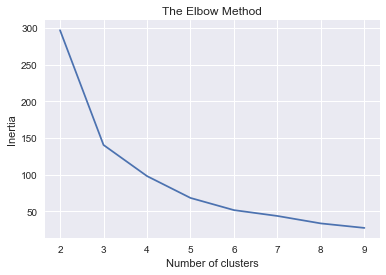

In [57]:
# Using the Elbow method to find the optimal number of clusters.
# By an elbow curve, where the x-axis represents the number of clusters and the y-axis is the evaluation metric.
# Create a kmeans function and fit it on the data 'df_perChange_byDay'

inertias = []
for i in range (2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_x_y)
    inertias.append(kmeans.inertia_)
plt.plot(range(2, 10), inertias)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

As the above figure shows, the optimal number of clusters should be about 6. Because when we changed the cluster value from 2 to 3 and 3 to 4, the inertia value reduced very sharply. This decrease in the inertia value reduces and eventually becomes constant as we increase the number of clusters further. In this chart, we could choose the optimal cluster between 5 and 7. When we choose the optimal number of clusters, the computation cost also needs to be considered. More clusters will have more computation cost. A lesser number of clusters will cost less. That is why we choose k = 5 as our optimal number of cluster. 

In [58]:
# Applying k-means to 'X' to 5 clusters
kmeans = KMeans(n_clusters = 5)

# Fitting
y = kmeans.fit_predict(df_x_y)

# Prediction
prediction = kmeans.predict(df_x_y)
print(prediction)

[1 1 3 2 2 2 3 3 3 1 1 2 2 0 1 2 0 0 2 1 2 2 2 3 3 1 3 1 1 4 0 3 3 3]


In [59]:
df_x_y['cluster'] = prediction
df_x_y.sort_values(['Growth_rate'], ascending=False)


,Day_1,Growth_rate,cluster
Ireland,3.761200,17.255814,0
Luxembourg,4.343805,16.311688,0
Lithuania,2.833213,15.117647,0
Hubei,6.095825,15.110360,0
US,8.959697,12.061416,4
Czech,4.510860,8.153846,2
Portugal,5.802118,8.048338,2
Latvia,2.833213,7.176471,2
Croatia,4.174387,6.615385,2
Malta,2.484907,6.500000,2


In [60]:
# inertia on the fitted data for 5 clusters
kmeans.inertia_

68.25251703142409

Inertia calculates the sum of distances of all the points within a cluster from the centroid of that cluster. The lesser the inertia value, the better our clusters are.

In [61]:
# The centers of 5 clusters
kmeans.cluster_centers_

array([[ 4.25851086, 15.94887742],
       [ 8.12669244,  3.76891622],
       [ 3.96860362,  6.18569234],
       [ 6.25420078,  1.36595659],
       [ 8.95969715, 12.06141591]])

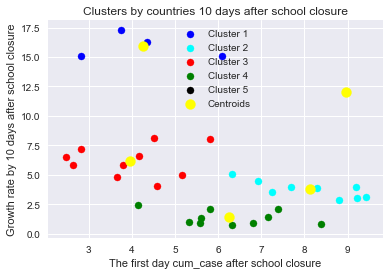

In [62]:
# Visualising the 5 clusters

# Making a scatter plot of df_log and y_kmeans
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s = 50, c = 'green', label = 'Cluster 4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s = 50, c = 'black', label = 'Cluster 5')

# Asign the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

# Plotting clusters
plt.title('Clusters by countries 10 days after school closure')
plt.xlabel('The first day cum_case after school closure')
plt.ylabel('Growth rate by 10 days after school closure')
plt.legend()
plt.show()

References: 
    1. The database of "COVID-19 Impact on Education", UNESCO, https://en.unesco.org/covid19/educationresponse
    2. "Map: Coronavirus and School Closures", Education Week, https://www.edweek.org/ew/section/multimedia/map-coronavirus-and-school-closures.html
    3. "China population", worldometer, https://www.worldometers.info/world-population/china-population/
    4. "Hubei population", World population net, https://www.renkou.org.cn/china/hubei/